In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)


In [57]:
California_Housing = pd.read_csv("housing.csv")

In [58]:
California_Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Handling missing values

In [59]:
California_Housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [60]:
Mask = California_Housing.isnull().any(axis=0)
Mask

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [61]:
Total_bedrooms_mean = California_Housing['total_bedrooms'].mean(axis=0)
Total_bedrooms_mean

537.8705525375618

In [62]:
California_Housing['total_bedrooms'] =  California_Housing['total_bedrooms'].fillna(Total_bedrooms_mean)

In [63]:
Mask = California_Housing.isnull().any(axis=0)
Mask

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [64]:
California_Housing.loc[290,'total_bedrooms']

537.8705525375618

## handling Outliers with IQR method

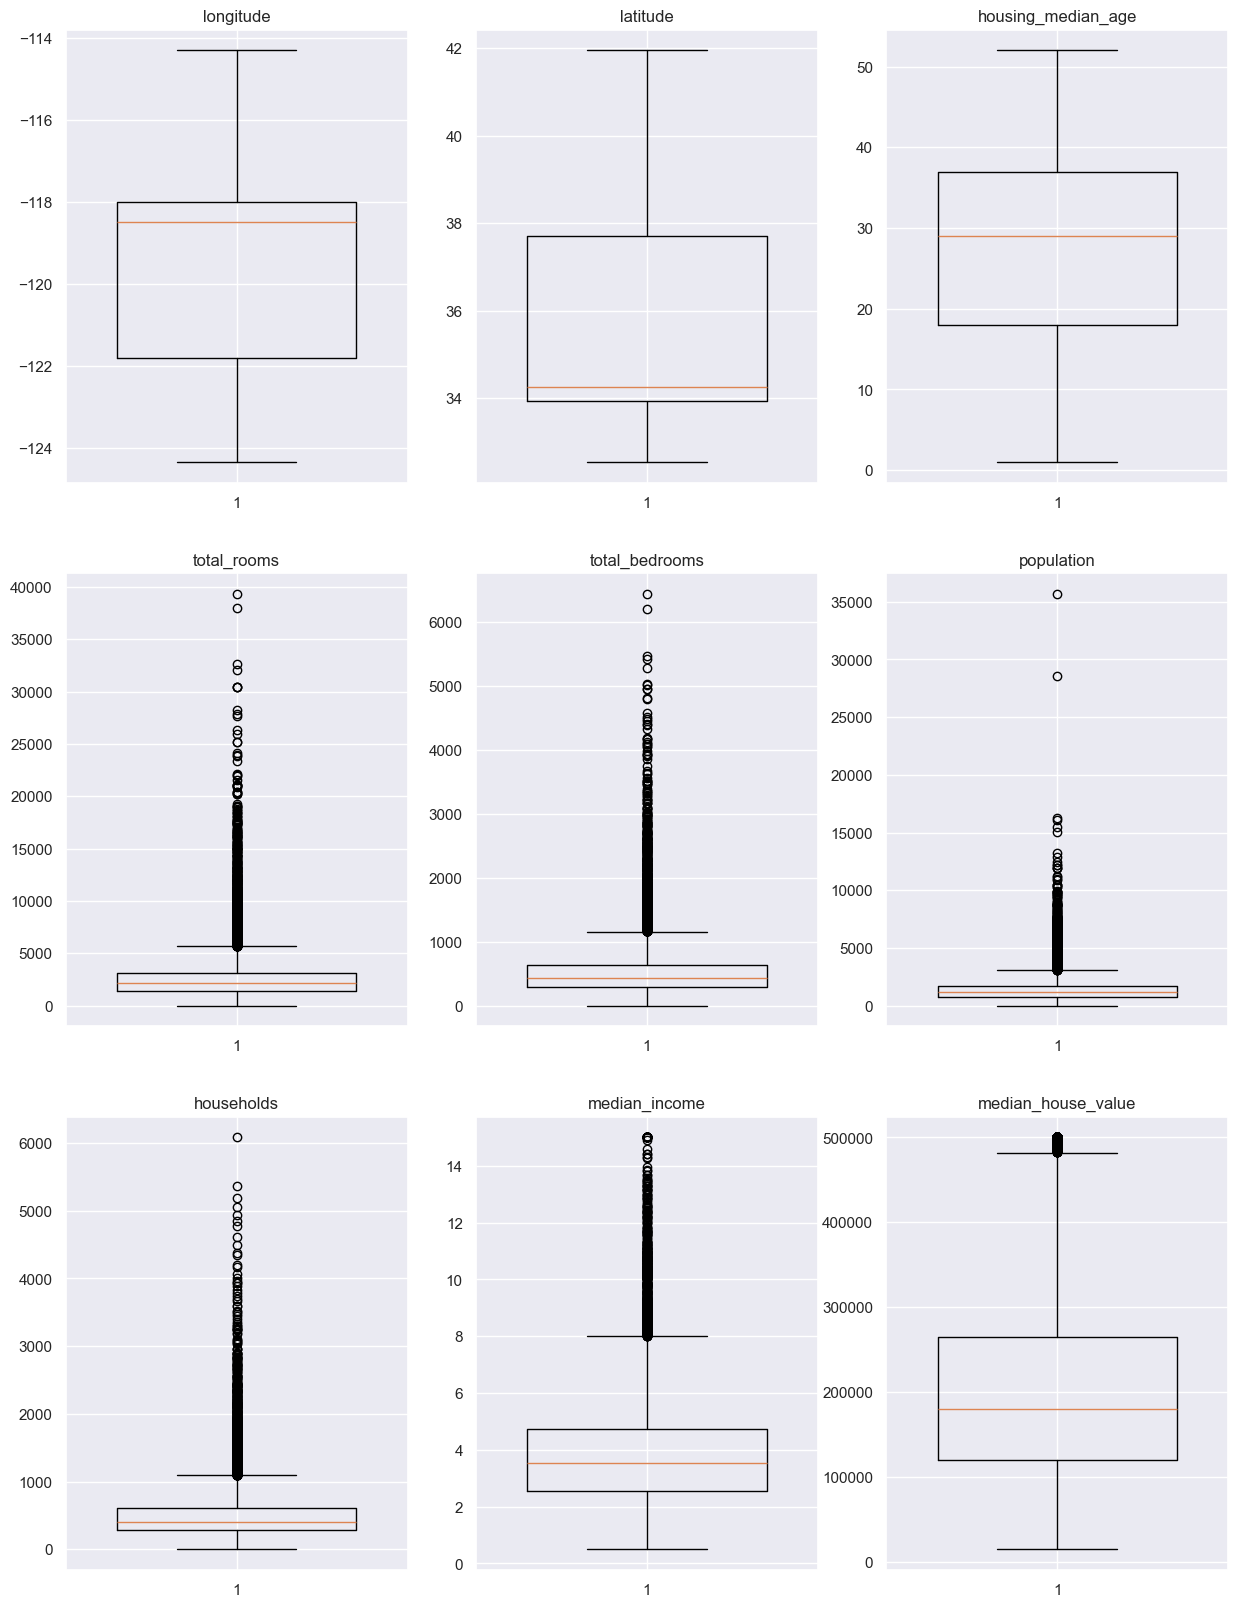

In [65]:
# Get the list of column names
column_names = California_Housing.columns

# Create a 3-row, 3-column subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# Iterate through each column and create a boxplot
for i, column in enumerate(column_names[:9]):
    # Calculate the row and column indices
    row_index, col_index = divmod(i, 3)

#     # Create a boxplot on the specific subplot
    axes[row_index, col_index].boxplot(California_Housing[column], vert=True, widths=0.7)
    axes[row_index, col_index].set_title(column)

plt.show()

In [66]:
# sns.boxplot(California_Housing['total_rooms'])

In [67]:
def IQR(column)->str:
    q1 = California_Housing[column].quantile(0.25)
    q3 = California_Housing[column].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    lower_limit, upper_limit

    # copying - change the outliers values to upper or limit values
    new_data = California_Housing.copy()
    new_data.loc[new_data[column] > upper_limit, column] = upper_limit
    new_data.loc[new_data[column] < lower_limit, column] = lower_limit

    return new_data

In [68]:
names_of_columns = California_Housing.keys()
limit = len(California_Housing.columns) - 1
for i in range(limit):
    California_Housing = IQR(names_of_columns[i])

In [69]:
# sns.boxplot(California_Housing['total_rooms'])

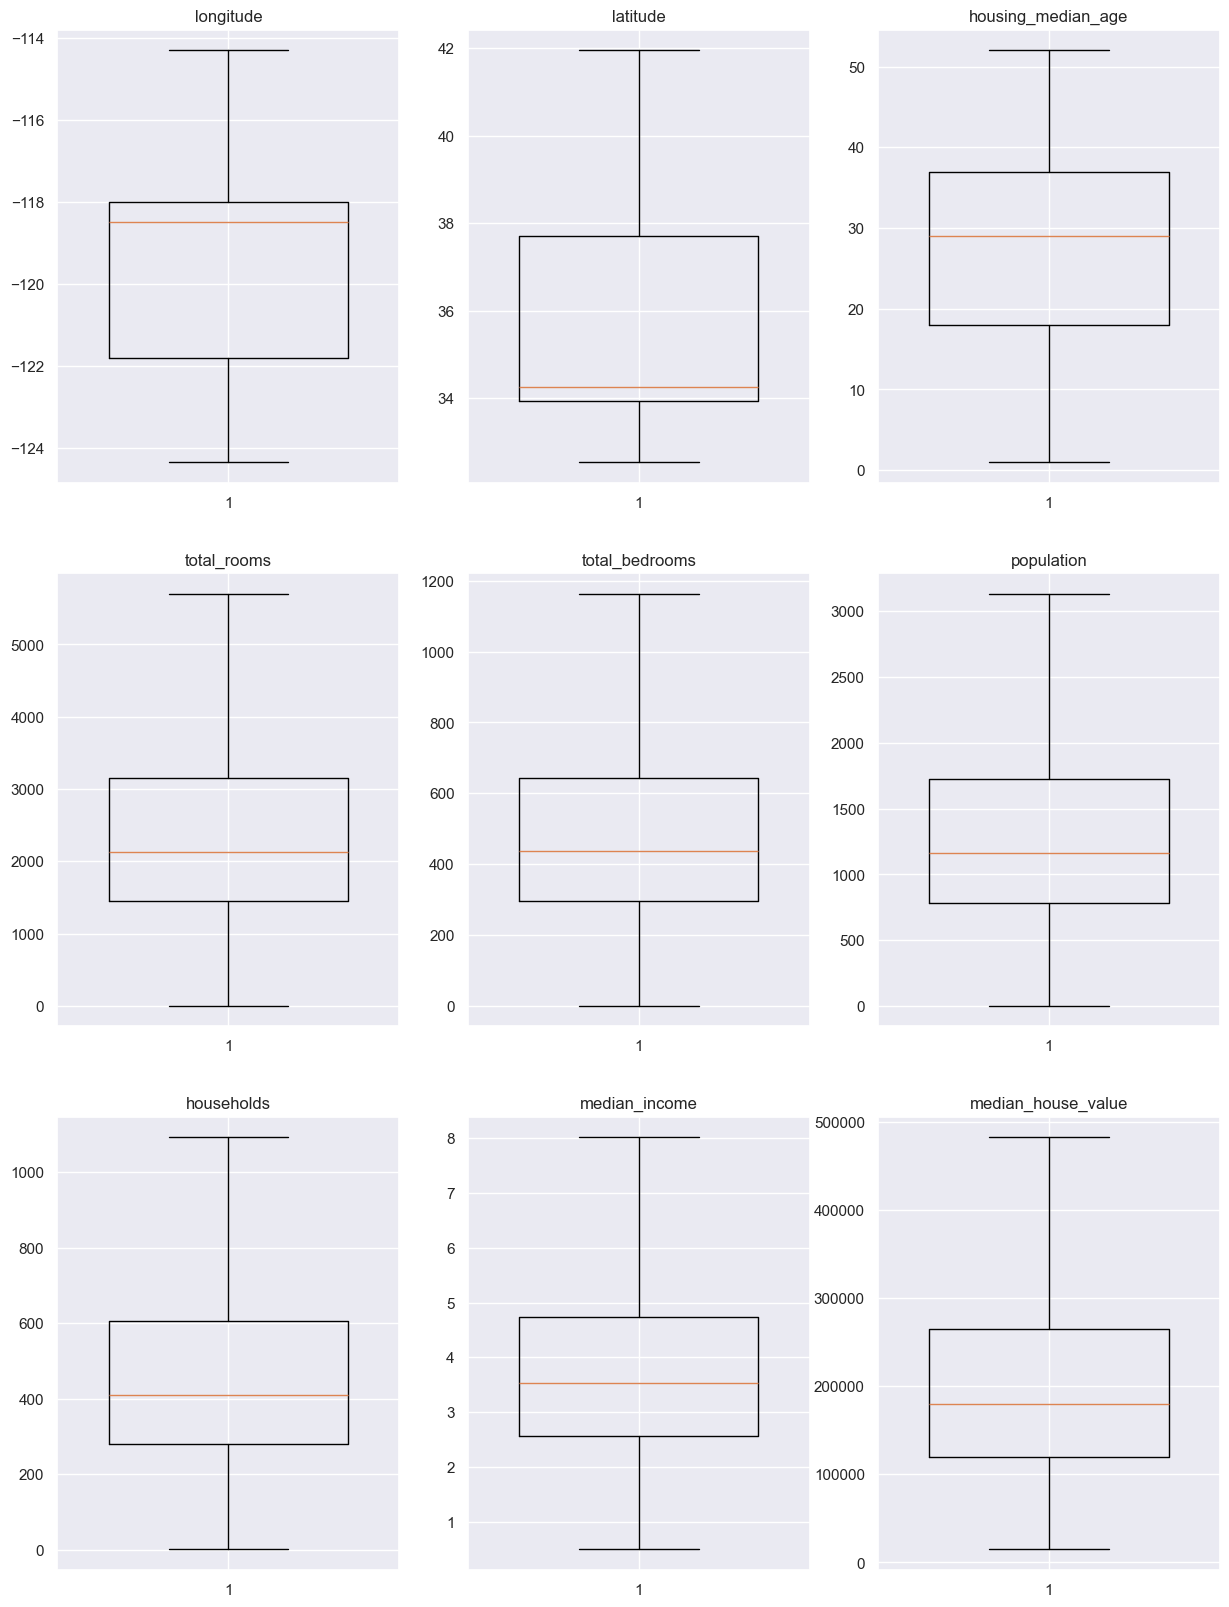

In [70]:
# Get the list of column names
column_names = California_Housing.columns

# Create a 3-row, 3-column subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# Iterate through each column and create a boxplot
for i, column in enumerate(column_names[:9]):
    # Calculate the row and column indices
    row_index, col_index = divmod(i, 3)

#     # Create a boxplot on the specific subplot
    axes[row_index, col_index].boxplot(California_Housing[column], vert=True, widths=0.7)
    axes[row_index, col_index].set_title(column)

plt.show()

## Handling Categoriacal values (using encoding)

In [71]:
California_Housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [72]:
dummies = pd.get_dummies(California_Housing.ocean_proximity).astype('int')
dummies.head(15)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [73]:
Data_encoded = pd.concat([California_Housing,dummies], axis='columns')
Data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,NEAR BAY,0,0,0,1,0


In [74]:
# Droping column ISLAND with 5 values
California_Housing = Data_encoded.drop(['ocean_proximity', 'ISLAND'], axis='columns')
California_Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0,0,1,0


In [75]:
corr = California_Housing.corr() #relations between columns


<Axes: >

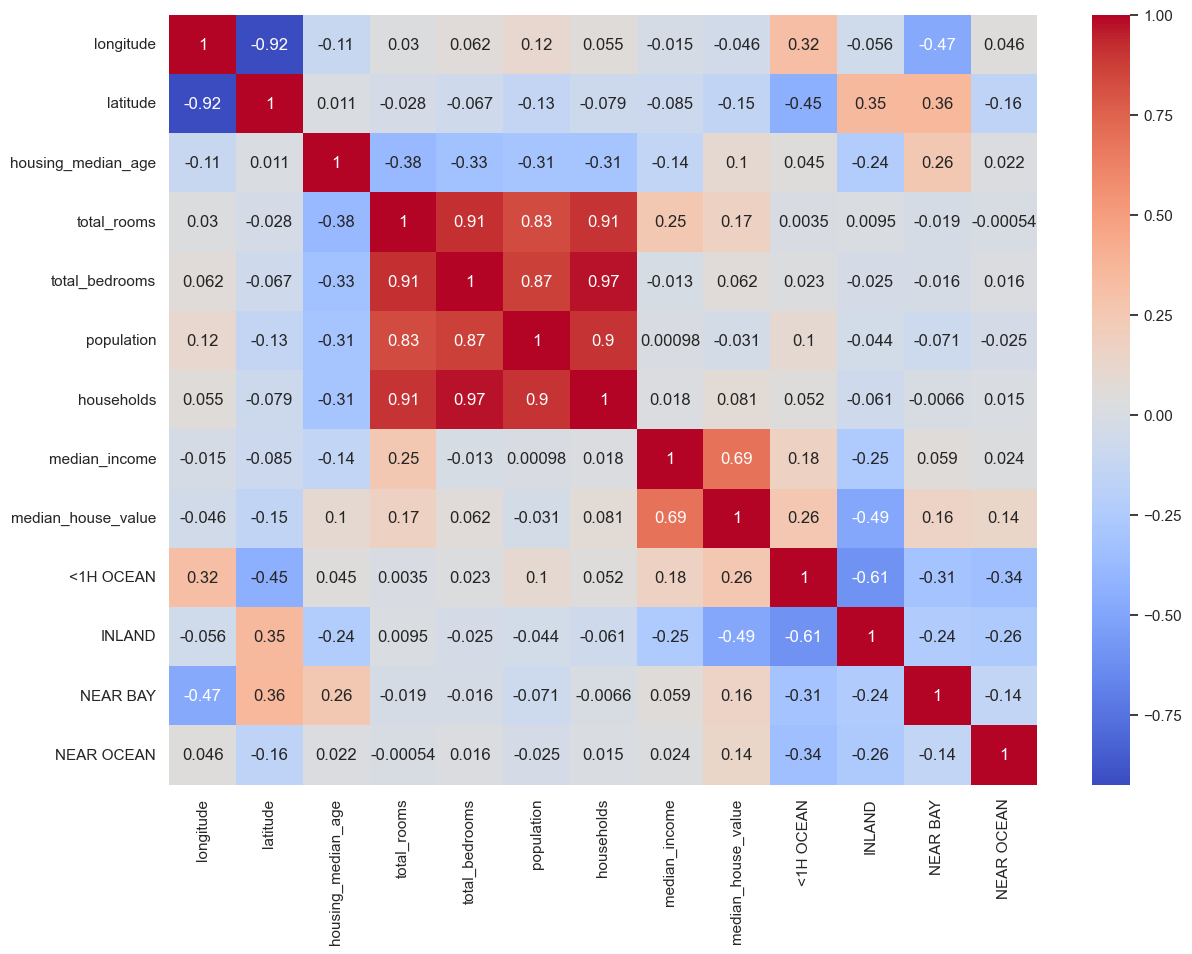

In [76]:
# display correlation matrix in heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

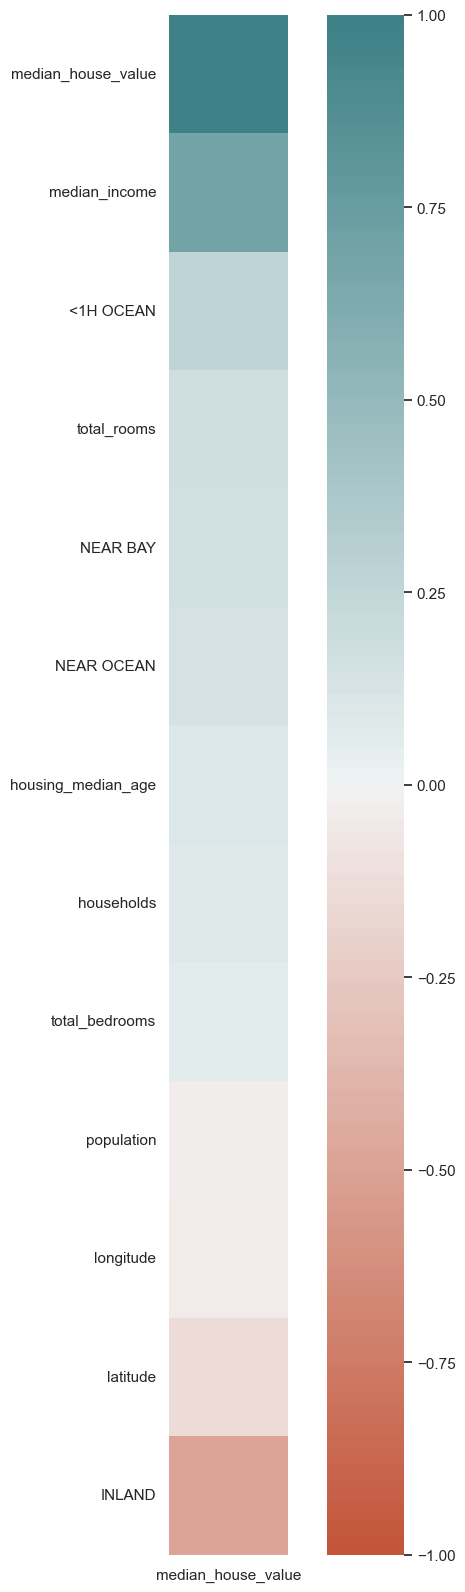

In [77]:
#sort by the amount of correlation
corr_house_value=corr[['median_house_value']]
corr_house_value=corr_house_value.sort_values(by ='median_house_value',ascending=False)

plt.figure(figsize = (10,20))
import seaborn as sns
sns.set(font_scale=1.0)
ax = sns.heatmap(
    corr_house_value,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True
)

The above correlation plot enables us to assess the variable "Median House Value" in relation to the other numerical variables. This analysis serves as a preliminary step in feature selection for model building. While this approach has been applied to "Median House Value," manually repeating the process for each variable against the remaining could be laborious. Hence, there is a need for an automated mechanism to identify pairs of variables exhibiting the strongest correlation. This streamlining is crucial for efficient and effective feature selection in the context of model development.

In [78]:
X = California_Housing.drop(columns=['median_house_value'])
y = California_Housing['median_house_value']

## Feature Scalling

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [80]:
print(X)

[[-1.32783522  1.05254828  0.98214266 ... -0.68188905  2.83074203
  -0.38446649]
 [-1.32284391  1.04318455 -0.60701891 ... -0.68188905  2.83074203
  -0.38446649]
 [-1.33282653  1.03850269  1.85618152 ... -0.68188905  2.83074203
  -0.38446649]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  1.46651424 -0.35326426
  -0.38446649]
 [-0.87362627  1.77823747 -0.84539315 ...  1.46651424 -0.35326426
  -0.38446649]
 [-0.83369581  1.75014627 -1.00430931 ...  1.46651424 -0.35326426
  -0.38446649]]


## Spliting Data to Train,Test

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [82]:
print(X_test.shape)
print(y_test.shape)
print("-------------------")
print(X_train.shape)
print(y_train.shape)
print("-------------------")


(5160, 12)
(5160,)
-------------------
(15480, 12)
(15480,)
-------------------


## Linear Regression Model

In [83]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred = reg.predict(X_test)
y_pred

array([200255.97107392, 294089.98343755, 184181.22588339, ...,
       241474.15194443, 310451.55983049, 288895.96874538])

In [86]:
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))

Training Score:  0.6673320508073041
Testing Score:  0.6606486635360957


In [87]:
yp = np.array(y_pred)
yt = np.array(y_test)
yp = yp.reshape(-1,1)
yt = yt.reshape(-1,1)

# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
yp = scaler.fit_transform(yp)
yt = scaler.fit_transform(yt)

yp = yp.flatten()
yt = yt.flatten()
print(yp)
print(y_pred)

[2.43931902 3.29703744 2.29238291 ... 2.81608638 3.44659542 3.24955997]
[200255.97107392 294089.98343755 184181.22588339 ... 241474.15194443
 310451.55983049 288895.96874538]


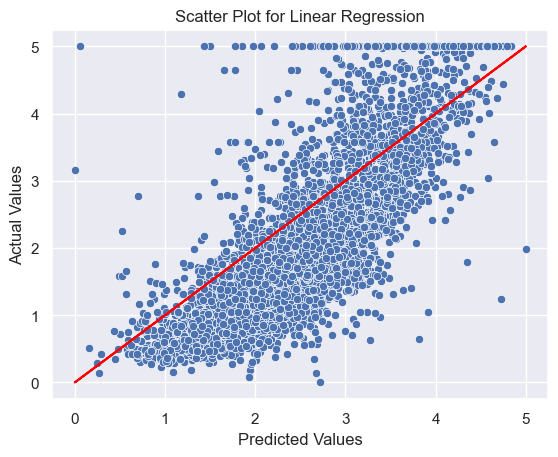

In [88]:
# Create scatter plot
sns.scatterplot(x=yp, y=yt)
plt.plot(yp, yp, color='red')  # Add the regression line
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot for Linear Regression')
plt.show()

## RMSE (Root Mean Squared Error)

In [89]:
from sklearn.metrics import mean_squared_error
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)

RMSE:  65729.01258617992


## Training the K-NN model on the Training set

In [90]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors = 5)

y_ = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_pred

array([130220., 273900., 130600., ..., 151420., 239820., 263240.])

In [91]:
predict_df = pd.DataFrame({"y_Test" : y_test, "y_Predicted" : y_pred})
predict_df.head()

,y_Test,y_Predicted
14740,136900.0,130220.0
10101,241300.0,273900.0
20566,200700.0,130600.0
2670,72500.0,75860.0
15709,460000.0,234360.0


In [92]:
print('Training Score: ', knn.score(X_train, y_train))
print('Testing Score: ', knn.score(X_test, y_test))


Training Score:  0.8145866287668804
Testing Score:  0.71305731076205


In [93]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

41093.57331395349

In [94]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3653085328.848327

# The predicted values with different k neighbors

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

MSE = []
MSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    mse_cv = -1 * cross_val_score(knn_model, X_train,y_train, cv = 10,
                        scoring = "neg_mean_squared_error").mean()
    MSE.append(mse)
    MSE_CV.append(mse_cv)
    print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv)

k = 1 MSE : 5498248697.331831 MSE_CV: 5573882494.479425
k = 2 MSE : 4387900037.005148 MSE_CV: 4360013122.121343
k = 3 MSE : 3911353272.9267063 MSE_CV: 3931856441.9902077
k = 4 MSE : 3739170933.8697524 MSE_CV: 3752874266.958326
k = 5 MSE : 3653085328.848327 MSE_CV: 3665860066.9826975
k = 6 MSE : 3600050882.9412465 MSE_CV: 3601394768.3812356
k = 7 MSE : 3562906204.6586227 MSE_CV: 3529576142.3957214
k = 8 MSE : 3547610892.8648334 MSE_CV: 3500381854.0545425
k = 9 MSE : 3550051111.927621 MSE_CV: 3478918337.231279
k = 10 MSE : 3543347620.4486303 MSE_CV: 3469874443.1724677


In [96]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
# print(knn_cv_model)
knn_cv_model.fit(X_train, y_train)
print(knn_cv_model)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})


## What's the best k can give higher accuracy ?

In [97]:
knn_cv_model.best_params_["n_neighbors"]

10

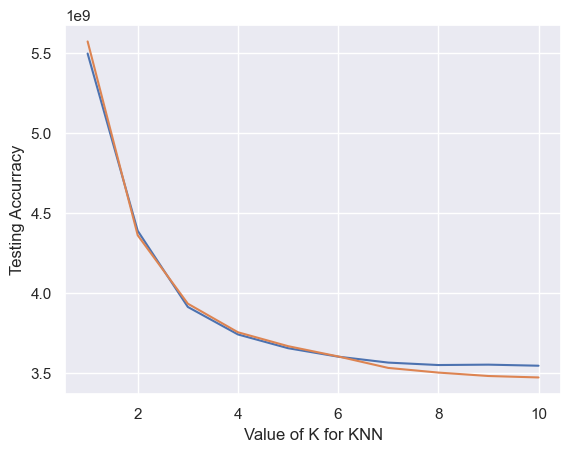

In [98]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,11,1), MSE)
plt.plot(np.arange(1,11,1), MSE_CV)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");

## Test the predicted values when k = 10

In [99]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)
predicted_values = knn_model.predict(X_test)
predicted_values

array([133570., 271340., 139620., ..., 157190., 279570., 273260.])

In [100]:
predict_df = pd.DataFrame({"y_Test" : y_test, "y_Predicted" : predicted_values})
predict_df.head()

,y_Test,y_Predicted
14740,136900.0,133570.00
10101,241300.0,271340.00
20566,200700.0,139620.00
2670,72500.0,82790.00
15709,460000.0,278661.25


In [101]:
knn.fit(X_train , y_train)
print('Training Score: ', knn.score(X_train, y_train))
print('predicted Score: ', knn.score(X_test, predicted_values))


Training Score:  0.8145866287668804
predicted Score:  0.9601838301013791


## RMSE (Root Mean Squared Error)

In [102]:
from sklearn.metrics import mean_squared_error
rmse   = np.sqrt(mean_squared_error(y_test,predicted_values))
print('RMSE: ',rmse)

RMSE:  59526.0247324532


In [103]:
# reshape data to be 2d array
yp = np.array(predicted_values)
yt = np.array(y_test)
yp = yp.reshape(-1,1)
yt = yt.reshape(-1,1)

# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
yp = scaler.fit_transform(yp)
yt = scaler.fit_transform(yt)

# reshape data to be 1d array
yp = yp.flatten()
yt = yt.flatten()
print(yp)
print(predicted_values)

[0.97488649 2.56454339 1.04469432 ... 1.24742548 2.65950511 2.58669728]
[133570. 271340. 139620. ... 157190. 279570. 273260.]


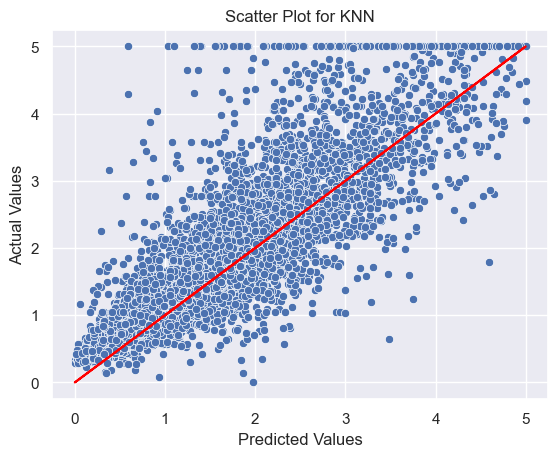

In [104]:
# Create scatter plot
sns.scatterplot(x=yp, y=yt)
plt.plot(yp, yp, color='red')  # Add the regression line
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot for KNN')
plt.show()